In [1]:
# Import necessary libraries
import os
from pathlib import Path

# Define the original dataset folder path
ORIGINAL_IMAGE_PATH = Path("/kaggle/input/banana-disease-recognition-dataset/Banana Disease Recognition Dataset/Original Images/Original Images")

# Get all images in the original dataset
ORIGINAL_IMAGE_PATH_LIST = list(ORIGINAL_IMAGE_PATH.glob("*/*.jpg"))

# Print total number of images
print(f'Total Original Images = {len(ORIGINAL_IMAGE_PATH_LIST)}')

# Get the list of class directories and sort them
classes = sorted(os.listdir(ORIGINAL_IMAGE_PATH))

# Print total number of classes
print('==' * 20)
print(' ' * 10, f'Total Classes = {len(classes)}')
print('==' * 20)

# Print the number of images per class
for c in classes:
    total_images_class = list(Path(os.path.join(ORIGINAL_IMAGE_PATH, c)).glob("*.jpg"))
    print(f'* {c}: {len(total_images_class)} images')


Total Original Images = 408
           Total Classes = 7
* Banana Black Sigatoka Disease: 67 images
* Banana Bract Mosaic Virus Disease: 50 images
* Banana Healthy Leaf: 86 images
* Banana Insect Pest Disease: 86 images
* Banana Moko Disease: 55 images
* Banana Panama Disease: 41 images
* Banana Yellow Sigatoka Disease: 23 images


In [2]:
# Import necessary libraries
import os
from pathlib import Path

# Define the augmented dataset folder path
AUGMENTED_IMAGE_PATH = Path("/kaggle/input/banana-disease-recognition-dataset/Banana Disease Recognition Dataset/Augmented images/Augmented images")

# Get all images in the augmented dataset
AUGMENTED_IMAGE_PATH_LIST = list(AUGMENTED_IMAGE_PATH.glob("*/*.jpg"))

# Print total number of images
print(f'Total Augmented Images = {len(AUGMENTED_IMAGE_PATH_LIST)}')

# Get the list of class directories and sort them
classes = sorted(os.listdir(AUGMENTED_IMAGE_PATH))

# Print total number of classes
print('==' * 20)
print(' ' * 10, f'Total Classes = {len(classes)}')
print('==' * 20)

# Print the number of images per class
for c in classes:
    total_images_class = list(Path(os.path.join(AUGMENTED_IMAGE_PATH, c)).glob("*.jpg"))
    print(f'* {c}: {len(total_images_class)} images')


Total Augmented Images = 2856
           Total Classes = 7
* Augmented Banana Black Sigatoka Disease: 469 images
* Augmented Banana Bract Mosaic Virus Disease: 350 images
* Augmented Banana Healthy Leaf: 602 images
* Augmented Banana Insect Pest Disease: 602 images
* Augmented Banana Moko Disease: 385 images
* Augmented Banana Panama Disease: 287 images
* Augmented Banana Yellow Sigatoka Disease: 161 images


In [3]:
# Determing number of null images in the original dataset folder

# Define the path to the original images
ORIGINAL_IMAGE_PATH = Path("/kaggle/input/banana-disease-recognition-dataset/Banana Disease Recognition Dataset/Original Images/Original Images")

# Get all JPG image paths
ORIGINAL_IMAGE_PATH_LIST = list(ORIGINAL_IMAGE_PATH.glob("*/*.jpg"))

# Print the total count of found images
print(f'Total Original Images Found = {len(ORIGINAL_IMAGE_PATH_LIST)}')

# Check for missing or unreadable files
missing_files = [img for img in ORIGINAL_IMAGE_PATH_LIST if not img.exists() or img.stat().st_size == 0]

# Print results
if missing_files:
    print(f"Total Missing or Unreadable Images: {len(missing_files)}")
    for img in missing_files[:10]:  # Print only first 10 for preview
        print(img)
else:
    print("No missing or unreadable original images found.")


Total Original Images Found = 408
No missing or unreadable original images found.


In [4]:
# Determing number of null images in the augmented dataset folder

# Define the path to the augmented images
AUGMENTED_IMAGE_PATH = Path("/kaggle/input/banana-disease-recognition-dataset/Banana Disease Recognition Dataset/Augmented images/Augmented images")

# Get all JPG image paths
AUGMENTED_IMAGE_PATH_LIST = list(AUGMENTED_IMAGE_PATH.glob("*/*.jpg"))

# Print the total count of found images
print(f'Total Augmented Images Found = {len(AUGMENTED_IMAGE_PATH_LIST)}')

# Check for missing or unreadable files
missing_files = [img for img in AUGMENTED_IMAGE_PATH_LIST if not img.exists() or img.stat().st_size == 0]

# Print results
if missing_files:
    print(f"Total Missing or Unreadable Augmented Images: {len(missing_files)}")
    for img in missing_files[:10]:  # Print only first 10 for preview
        print(img)
else:
    print("No missing or unreadable augmented images found.")


Total Augmented Images Found = 2856
No missing or unreadable augmented images found.


In [5]:
import shutil
import random
import numpy as np
from pathlib import Path

# Set the random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define source directories
original_images_path = Path("/kaggle/input/banana-disease-recognition-dataset/Banana Disease Recognition Dataset/Original Images/Original Images")
augmented_images_path = Path("/kaggle/input/banana-disease-recognition-dataset/Banana Disease Recognition Dataset/Augmented images/Augmented images")

# Define destination dataset directory
combined_dataset_path = Path("/kaggle/working/combined-banana-disease-dataset")
train_path = combined_dataset_path / "train"
val_path = combined_dataset_path / "val"
test_path = combined_dataset_path / "test"

# Create directories if they don’t exist
for path in [train_path, val_path, test_path]:
    path.mkdir(parents=True, exist_ok=True)

# Get all images from both folders
original_images = list(original_images_path.glob("*/*.jpg"))
augmented_images = list(augmented_images_path.glob("*/*.jpg"))

# Merge datasets
all_images = original_images + augmented_images
print(f"Total Combined Images: {len(all_images)}")

# Shuffle dataset in a reproducible way
random.shuffle(all_images)

# Perform an 80-10-10 split
train_split = int(0.8 * len(all_images))
val_split = int(0.9 * len(all_images))

train_images = all_images[:train_split]
val_images = all_images[train_split:val_split]
test_images = all_images[val_split:]

# Function to copy images to respective folders with cleaned labels
def copy_images(image_list, dest_folder):
    for img in image_list:
        # Extract the class name (parent folder)
        class_name = img.parent.name.replace("Augmented ", "").strip()  # Remove "Augmented " from folder name
        
        # Create the correct class folder
        class_folder = dest_folder / class_name
        class_folder.mkdir(parents=True, exist_ok=True)
        
        # Clean the filename (remove "Augmented " from file name)
        new_filename = img.name.replace("Augmented ", "").strip()
        
        # Copy and rename the image
        shutil.copy(img, class_folder / new_filename)

# Copy images with cleaned labels and filenames
copy_images(train_images, train_path)
copy_images(val_images, val_path)
copy_images(test_images, test_path)

# Count the number of images in the processed dataset folders
train_count = sum(len(list(class_folder.glob("*.jpg"))) for class_folder in train_path.iterdir() if class_folder.is_dir())
val_count = sum(len(list(class_folder.glob("*.jpg"))) for class_folder in val_path.iterdir() if class_folder.is_dir())
test_count = sum(len(list(class_folder.glob("*.jpg"))) for class_folder in test_path.iterdir() if class_folder.is_dir())

print(f"Train: {train_count}, Val: {val_count}, Test: {test_count}")


Total Combined Images: 3264
Train: 2611, Val: 326, Test: 327


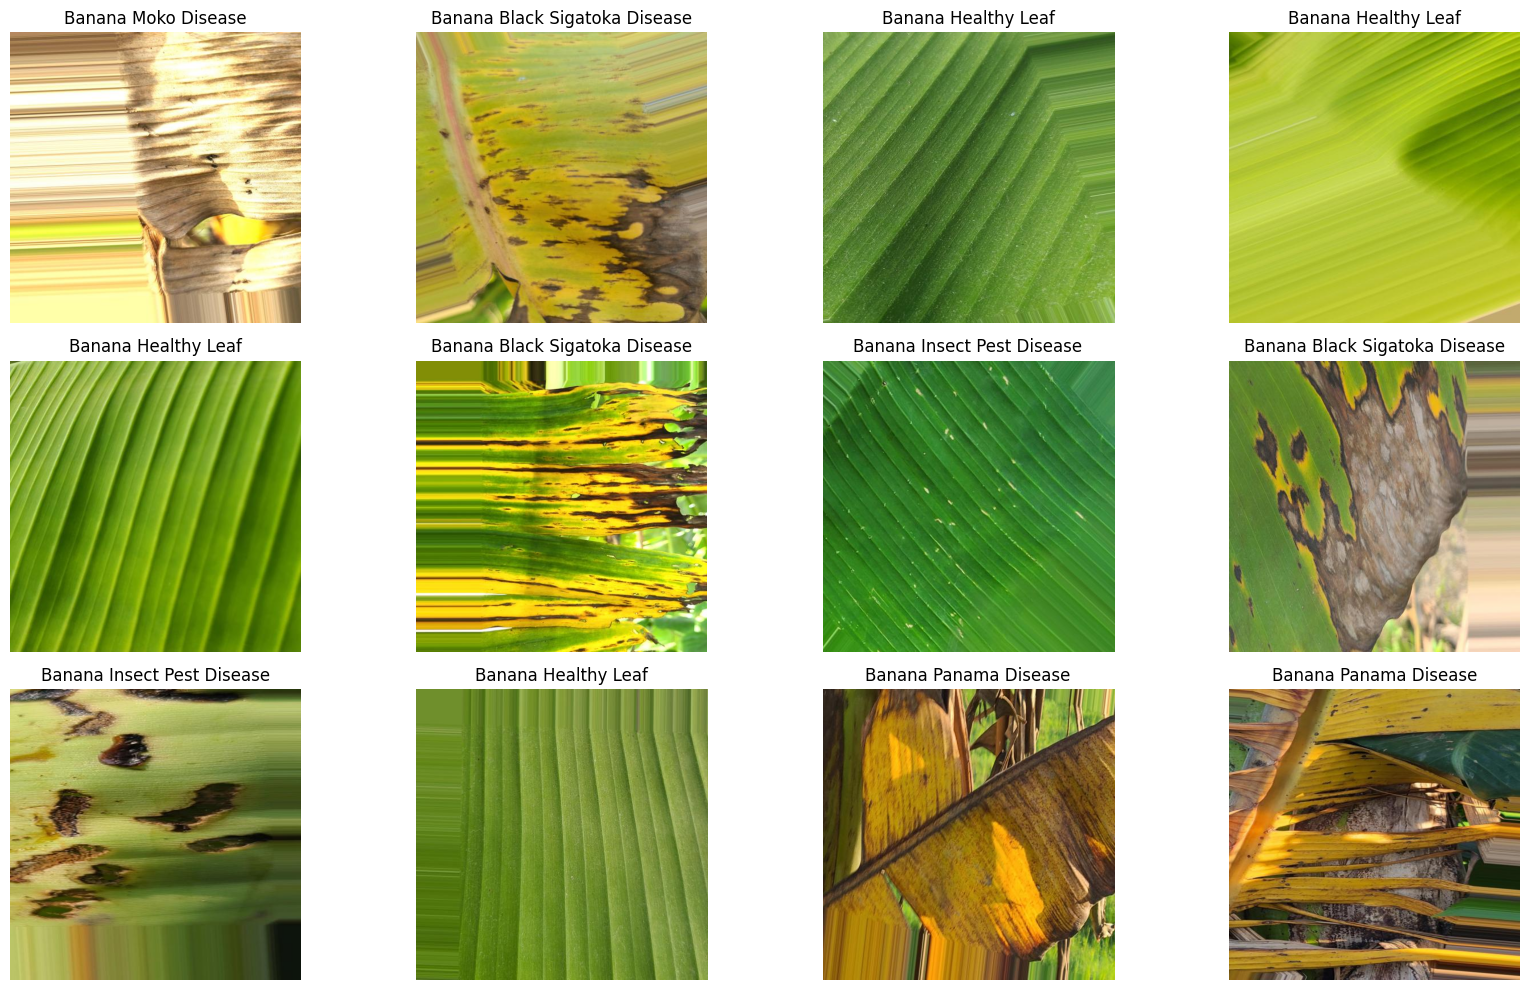

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import random

# Get all images from the processed training folder
train_images_processed = list(train_path.glob("*/*.jpg"))

# Select 12 random images
num_samples = 12
sample_images = random.sample(train_images_processed, num_samples)

# Display images in a grid (3 rows, 4 columns)
fig, axes = plt.subplots(3, 4, figsize=(17, 10))

for ax, img_path in zip(axes.flatten(), sample_images):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(img_path.parent.name)  # Folder name = Corrected label
    ax.axis("off")

plt.tight_layout()
plt.show()


In [7]:
import os
from pathlib import Path
import shutil

# Define paths
dataset_path = Path("/kaggle/working/combined-banana-disease-dataset")
train_path = dataset_path / "train"
val_path = dataset_path / "val"
test_path = dataset_path / "test"

# YOLO format paths
yolo_dataset_path = Path("/kaggle/working/yolo-banana-disease")
yolo_train_images = yolo_dataset_path / "train/images"
yolo_train_labels = yolo_dataset_path / "train/labels"
yolo_val_images = yolo_dataset_path / "val/images"
yolo_val_labels = yolo_dataset_path / "val/labels"
yolo_test_images = yolo_dataset_path / "test/images"
yolo_test_labels = yolo_dataset_path / "test/labels"

# Create YOLO folders
for path in [yolo_train_images, yolo_train_labels, yolo_val_images, yolo_val_labels, yolo_test_images, yolo_test_labels]:
    path.mkdir(parents=True, exist_ok=True)

# Define class names
classes = sorted(os.listdir(train_path))

# Function to convert class names to YOLO format
def convert_labels(image_list, source_folder, dest_image_folder, dest_label_folder):
    for img in image_list:
        class_name = img.parent.name  # Get class name
        class_id = classes.index(class_name)  # Convert to class index
        
        # Copy image
        shutil.copy(img, dest_image_folder / img.name)

        # Create YOLO annotation file (assuming classification, no bounding boxes)
        label_path = dest_label_folder / f"{img.stem}.txt"
        with open(label_path, "w") as f:
            f.write(f"{class_id} 0.5 0.5 1.0 1.0\n")  # Placeholder YOLO format

# Convert datasets
convert_labels(list(train_path.glob("*/*.jpg")), train_path, yolo_train_images, yolo_train_labels)
convert_labels(list(val_path.glob("*/*.jpg")), val_path, yolo_val_images, yolo_val_labels)
convert_labels(list(test_path.glob("*/*.jpg")), test_path, yolo_test_images, yolo_test_labels)

print("Dataset converted to YOLO format!")

Dataset converted to YOLO format!


In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.0/973.0 kB 14.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:

from ultralytics import YOLO

# Define dataset YAML
dataset_yaml = """
path: /kaggle/working/yolo-banana-disease
train: train/images
val: val/images
test: test/images
nc: 7
names: ['Banana Black Sigatoka Disease', 'Banana Bract Mosaic Virus Disease', 
        'Banana Healthy Leaf', 'Banana Insect Pest Disease', 'Banana Moko Disease', 
        'Banana Panama Disease', 'Banana Yellow Sigatoka Disease']
"""

# Save YAML file
yaml_path = "/kaggle/working/yolo-banana-disease/dataset.yaml"
with open(yaml_path, "w") as f:
    f.write(dataset_yaml)

# Load model
model = YOLO("yolo11m.pt")  # Load YOLO11 medium model

# Train model
model.train(data=yaml_path, epochs=40, imgsz=640, batch=16)

print("Training completed!")


Ultralytics 8.3.99 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/kaggle/working/yolo-banana-disease/dataset.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

train: Scanning /kaggle/working/yolo-banana-disease/train/labels.cache... 2611 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2611/2611 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/working/yolo-banana-disease/val/labels.cache... 326 images, 0 backgrounds, 0 corrupt: 100%|██████████| 326/326 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      8.17G     0.2236      1.372      1.009          8        640: 100%|██████████| 164/164 [01:33<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.30it/s]

                   all        326        326      0.427      0.515      0.487      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      9.68G     0.2077     0.9674     0.9593         11        640: 100%|██████████| 164/164 [01:30<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.31it/s]

                   all        326        326      0.482      0.537      0.488      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40       9.7G      0.194     0.9061     0.9491          7        640: 100%|██████████| 164/164 [01:30<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.31it/s]

                   all        326        326      0.435       0.71      0.599      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40       9.7G     0.1805     0.8536     0.9456         11        640: 100%|██████████| 164/164 [01:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.32it/s]

                   all        326        326      0.553       0.74      0.755      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40       9.7G     0.1478     0.8016     0.9256          9        640: 100%|██████████| 164/164 [01:30<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.33it/s]

                   all        326        326        0.7       0.81      0.857      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40       9.7G     0.1412     0.7552      0.928          8        640: 100%|██████████| 164/164 [01:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.32it/s]

                   all        326        326      0.873       0.87      0.945      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40       9.7G     0.1325     0.7133     0.9246         10        640: 100%|██████████| 164/164 [01:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.34it/s]

                   all        326        326      0.799      0.856      0.912      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40       9.7G     0.1283     0.7292     0.9156          8        640: 100%|██████████| 164/164 [01:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.32it/s]

                   all        326        326      0.763      0.837      0.891      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40       9.7G     0.1108     0.6813     0.9069         10        640: 100%|██████████| 164/164 [01:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.33it/s]

                   all        326        326      0.797      0.885      0.968      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40       9.7G    0.09445     0.6397     0.9026         12        640: 100%|██████████| 164/164 [01:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.32it/s]

                   all        326        326      0.924      0.955      0.982      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40       9.7G    0.09198     0.5957     0.9024          9        640: 100%|██████████| 164/164 [01:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.32it/s]

                   all        326        326      0.867      0.871      0.963      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40       9.7G    0.08945     0.5844     0.9031          9        640: 100%|██████████| 164/164 [01:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.35it/s]

                   all        326        326      0.904      0.931      0.976      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40       9.7G    0.08377     0.5545     0.8978          6        640: 100%|██████████| 164/164 [01:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.32it/s]

                   all        326        326       0.95      0.973      0.981      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40       9.7G    0.07704     0.5577     0.8956          7        640: 100%|██████████| 164/164 [01:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.34it/s]

                   all        326        326      0.946      0.965      0.987      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40       9.7G    0.08095     0.5267     0.9021         10        640: 100%|██████████| 164/164 [01:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.32it/s]

                   all        326        326      0.836       0.87      0.912      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40       9.7G    0.07796     0.5247     0.9017         10        640: 100%|██████████| 164/164 [01:29<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.35it/s]

                   all        326        326      0.943      0.944      0.981      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40       9.7G    0.07508     0.4978     0.8962          8        640: 100%|██████████| 164/164 [01:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.33it/s]

                   all        326        326      0.918      0.965      0.982      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40       9.7G    0.07282     0.4825     0.9024          5        640: 100%|██████████| 164/164 [01:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.35it/s]

                   all        326        326      0.878      0.941      0.963      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40       9.7G    0.06782     0.4588     0.8897         10        640: 100%|██████████| 164/164 [01:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.35it/s]

                   all        326        326      0.981      0.968      0.989      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40       9.7G    0.06754     0.4398     0.8916         10        640: 100%|██████████| 164/164 [01:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.35it/s]

                   all        326        326      0.954      0.978      0.988      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40       9.7G    0.06491     0.4343     0.8939          9        640: 100%|██████████| 164/164 [01:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.33it/s]

                   all        326        326      0.974      0.917      0.988      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40       9.7G    0.06389     0.4493     0.8912          8        640: 100%|██████████| 164/164 [01:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.33it/s]

                   all        326        326      0.941      0.977      0.985      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40       9.7G    0.05966     0.4086     0.8914         10        640: 100%|██████████| 164/164 [01:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.34it/s]

                   all        326        326      0.944      0.956      0.992      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40       9.7G    0.05801     0.4197     0.8936         11        640: 100%|██████████| 164/164 [01:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.33it/s]

                   all        326        326      0.966       0.96      0.988      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40       9.7G    0.05675     0.3951     0.8929          8        640: 100%|██████████| 164/164 [01:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.32it/s]

                   all        326        326      0.954      0.941      0.989      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40       9.7G    0.05018     0.3984     0.8942         10        640: 100%|██████████| 164/164 [01:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.34it/s]

                   all        326        326      0.947      0.951      0.984      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40       9.7G    0.04899     0.3654     0.8868         10        640: 100%|██████████| 164/164 [01:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.34it/s]

                   all        326        326      0.973      0.974      0.993      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40       9.7G    0.04665     0.3368     0.8863         12        640: 100%|██████████| 164/164 [01:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.33it/s]

                   all        326        326      0.989      0.976      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40       9.7G    0.04431     0.3419     0.8877          8        640: 100%|██████████| 164/164 [01:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.35it/s]

                   all        326        326      0.972      0.964      0.991      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40       9.7G    0.04515     0.3464     0.8922         10        640: 100%|██████████| 164/164 [01:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.32it/s]

                   all        326        326      0.897      0.945      0.969      0.965


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40       9.7G    0.05078     0.2579     0.9136          3        640: 100%|██████████| 164/164 [01:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.34it/s]

                   all        326        326      0.955      0.972       0.99      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40       9.7G    0.04093     0.1884     0.9009          3        640: 100%|██████████| 164/164 [01:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.34it/s]

                   all        326        326      0.961      0.981      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40       9.7G    0.03397     0.1732     0.9001          3        640: 100%|██████████| 164/164 [01:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.36it/s]

                   all        326        326      0.971      0.985      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40       9.7G    0.03253     0.1553     0.9004          3        640: 100%|██████████| 164/164 [01:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.35it/s]

                   all        326        326      0.992      0.997      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40       9.7G    0.02961      0.141     0.8976          3        640: 100%|██████████| 164/164 [01:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.33it/s]

                   all        326        326      0.988      0.991      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40       9.7G    0.02842     0.1269     0.9011          3        640: 100%|██████████| 164/164 [01:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.34it/s]

                   all        326        326      0.996      0.998      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40       9.7G     0.0269    0.09722     0.8953          3        640: 100%|██████████| 164/164 [01:29<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.34it/s]

                   all        326        326      0.988      0.999      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40       9.7G    0.02246     0.0941     0.9015          3        640: 100%|██████████| 164/164 [01:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.33it/s]

                   all        326        326      0.969      0.997      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40       9.7G    0.02185     0.1001     0.8928          3        640: 100%|██████████| 164/164 [01:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.32it/s]

                   all        326        326      0.985      0.997      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40       9.7G    0.02006     0.0711     0.9027          3        640: 100%|██████████| 164/164 [01:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.33it/s]

                   all        326        326      0.991      0.997      0.995      0.995



40 epochs completed in 1.065 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 40.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.99 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,035,429 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.12it/s]


                   all        326        326      0.992      0.997      0.995      0.995
Banana Black Sigatoka Disease         55         55      0.969          1      0.995      0.995
Banana Bract Mosaic Virus Disease         39         39          1      0.992      0.995      0.995
   Banana Healthy Leaf         61         61      0.993          1      0.995      0.995
Banana Insect Pest Disease         69         69          1      0.993      0.995      0.995
   Banana Moko Disease         49         49          1      0.993      0.995      0.995
 Banana Panama Disease         34         34      0.993          1      0.995      0.995
Banana Yellow Sigatoka Disease         19         19      0.991          1      0.995      0.995


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 11.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train2
Training completed!


In [13]:
import shutil

# Path to the best model trained
best_model_path = "/kaggle/working/runs/detect/train2/weights/best.pt"
saved_model_path = "/kaggle/working/best_model2.pt"

# Copy to a safe location
shutil.copy(best_model_path, saved_model_path)

print(f"Model saved at {saved_model_path}. Please download it!")


Model saved at /kaggle/working/best_model2.pt. Please download it!


In [14]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("/kaggle/working/runs/detect/train2/weights/best.pt")  # Replace with your best model path

# Validate the model
metrics = model.val(data="/kaggle/working/yolo-banana-disease/dataset.yaml")

# Print or inspect the metrics
print(metrics.results_dict) #prints the results in a dictionary

Ultralytics 8.3.99 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,035,429 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning /kaggle/working/yolo-banana-disease/val/labels.cache... 326 images, 0 backgrounds, 0 corrupt: 100%|██████████| 326/326 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.13it/s]


                   all        326        326      0.992      0.997      0.995      0.995
Banana Black Sigatoka Disease         55         55      0.969          1      0.995      0.995
Banana Bract Mosaic Virus Disease         39         39          1      0.992      0.995      0.995
   Banana Healthy Leaf         61         61      0.993          1      0.995      0.995
Banana Insect Pest Disease         69         69          1      0.993      0.995      0.995
   Banana Moko Disease         49         49          1      0.993      0.995      0.995
 Banana Panama Disease         34         34      0.993          1      0.995      0.995
Banana Yellow Sigatoka Disease         19         19       0.99          1      0.995      0.995


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.1ms preprocess, 25.2ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/val2
{'metrics/precision(B)': 0.9922665943416655, 'metrics/recall(B)': 0.9969176083414227, 'metrics/mAP50(B)': 0.995, 'metrics/mAP50-95(B)': 0.9950000000000003, 'fitness': 0.9950000000000003}


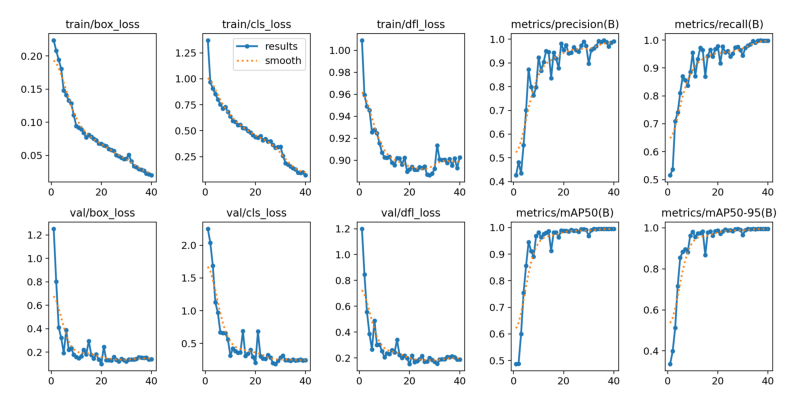

In [15]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to the results.png file
results_image_path = "/kaggle/working/runs/detect/train2/results.png"  # Update with your actual path

# Open and display the image
img = Image.open(results_image_path)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')  # Turn off axis for cleaner visualization
plt.show()


In [16]:
#make predictions
results = model.predict(source='yolo-banana-disease/test/images', conf=0.5, save=True, project=f"runs/detect", name="predict", exist_ok=True)


image 1/327 /kaggle/working/yolo-banana-disease/test/images/Banana Black Sigatoka Disease (103).jpg: 640x640 1 Banana Black Sigatoka Disease, 36.1ms
image 2/327 /kaggle/working/yolo-banana-disease/test/images/Banana Black Sigatoka Disease (104).jpg: 640x640 1 Banana Black Sigatoka Disease, 36.0ms
image 3/327 /kaggle/working/yolo-banana-disease/test/images/Banana Black Sigatoka Disease (105).jpg: 640x640 1 Banana Black Sigatoka Disease, 36.1ms
image 4/327 /kaggle/working/yolo-banana-disease/test/images/Banana Black Sigatoka Disease (107).jpg: 640x640 1 Banana Black Sigatoka Disease, 35.2ms
image 5/327 /kaggle/working/yolo-banana-disease/test/images/Banana Black Sigatoka Disease (112).jpg: 640x640 1 Banana Black Sigatoka Disease, 24.4ms
image 6/327 /kaggle/working/yolo-banana-disease/test/images/Banana Black Sigatoka Disease (138).jpg: 640x640 1 Banana Black Sigatoka Disease, 24.4ms
image 7/327 /kaggle/working/yolo-banana-disease/test/images/Banana Black Sigatoka Disease (152).jpg: 640x

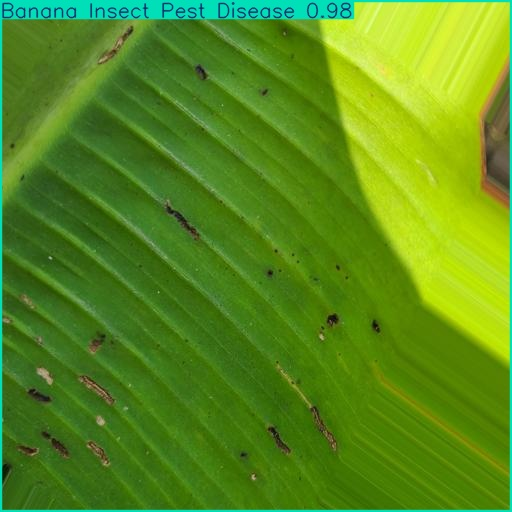

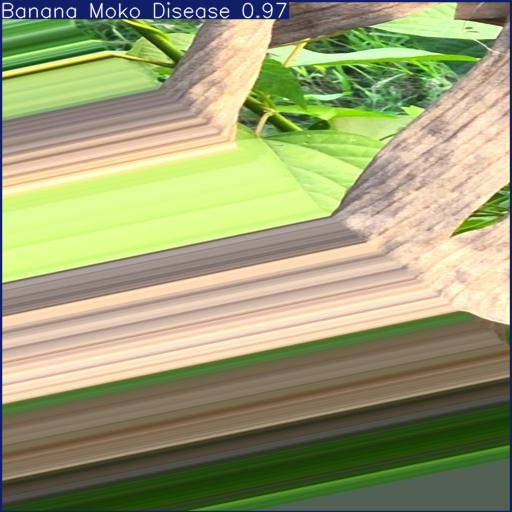

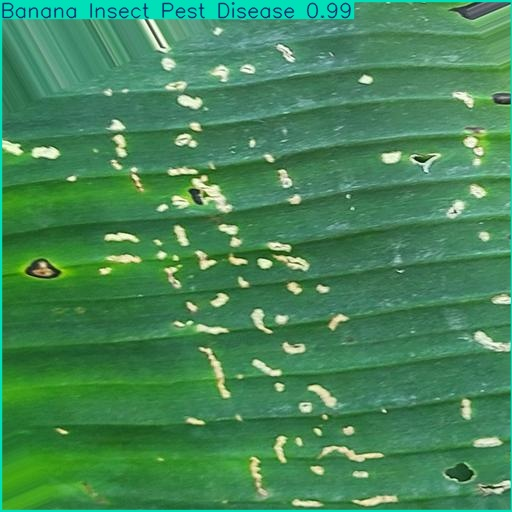

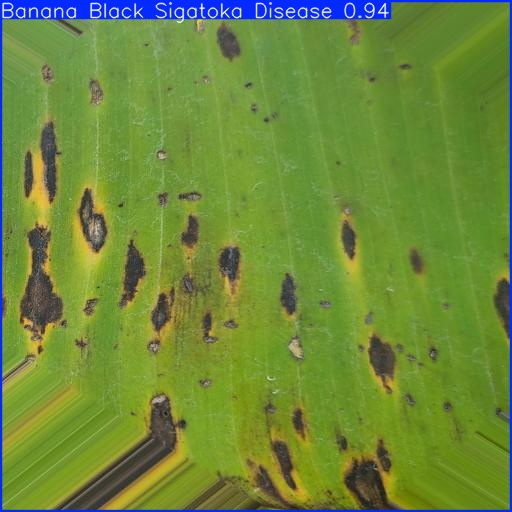

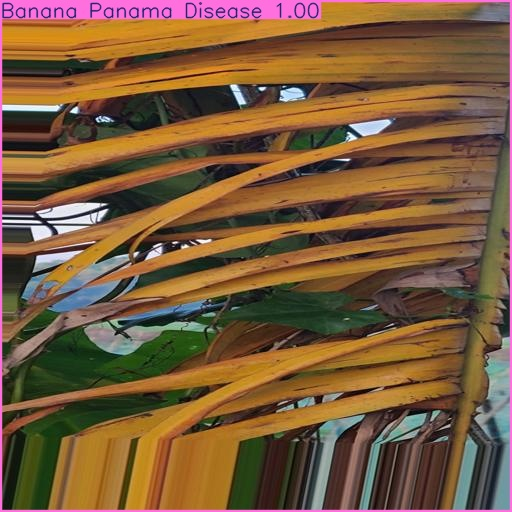

In [17]:
from glob import glob
from IPython.display import display, Image

# Display predictions
for image_path in glob('runs/detect/predict/*.jpg')[:5]:
    display(Image(filename=image_path, width=500, height=500))
    print("\n")



image 1/1 /kaggle/working/yolo-banana-disease/test/images/Banana Insect Pest Disease (425).jpg: 640x640 1 Banana Insect Pest Disease, 36.6ms
Speed: 2.5ms preprocess, 36.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/yolo-banana-disease/test/images/Banana Moko Disease (136).jpg: 640x640 1 Banana Moko Disease, 36.0ms
Speed: 2.5ms preprocess, 36.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/yolo-banana-disease/test/images/Banana Insect Pest Disease (221).jpg: 640x640 1 Banana Insect Pest Disease, 34.2ms
Speed: 2.3ms preprocess, 34.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/yolo-banana-disease/test/images/Banana Black Sigatoka Disease (317).jpg: 640x640 1 Banana Black Sigatoka Disease, 23.9ms
Speed: 2.3ms preprocess, 23.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/yolo-banana-disease/test/

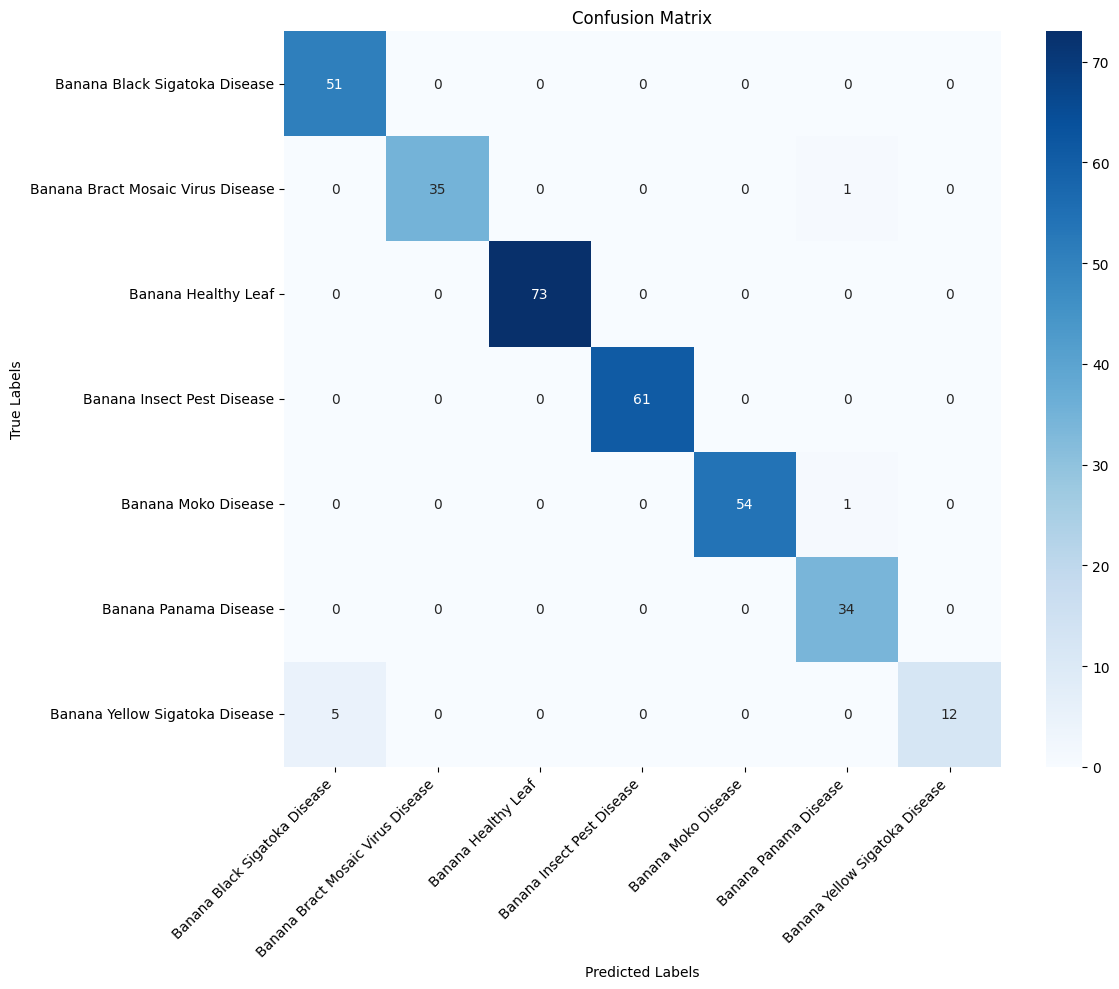

Total test samples evaluated: 327
Correctly classified: 320
Accuracy: 0.9786
Average confidence score: 0.9670


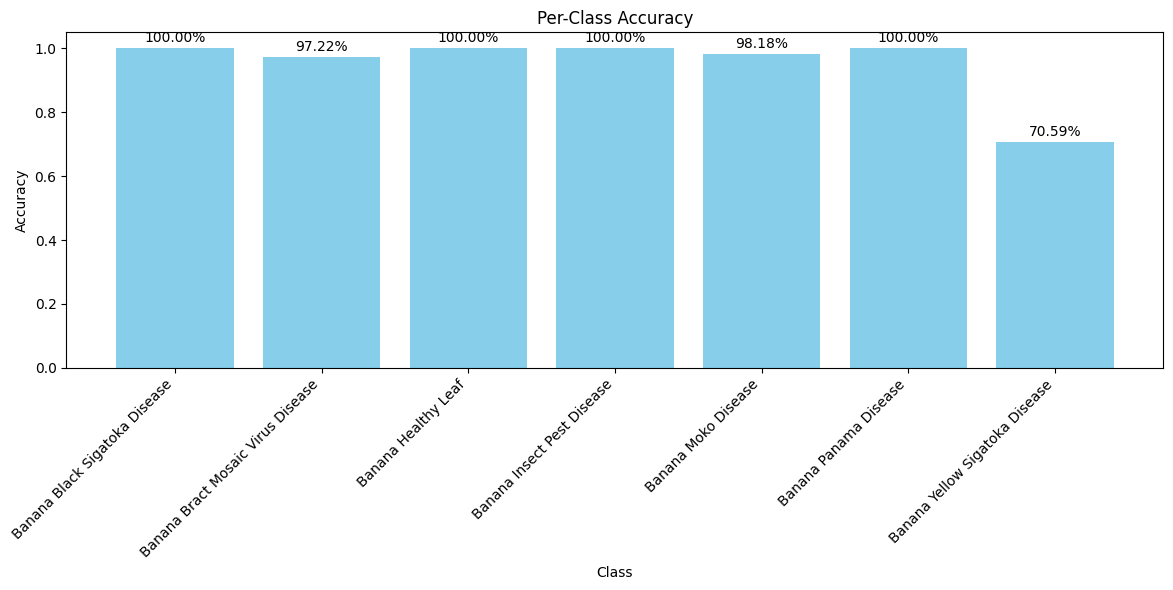

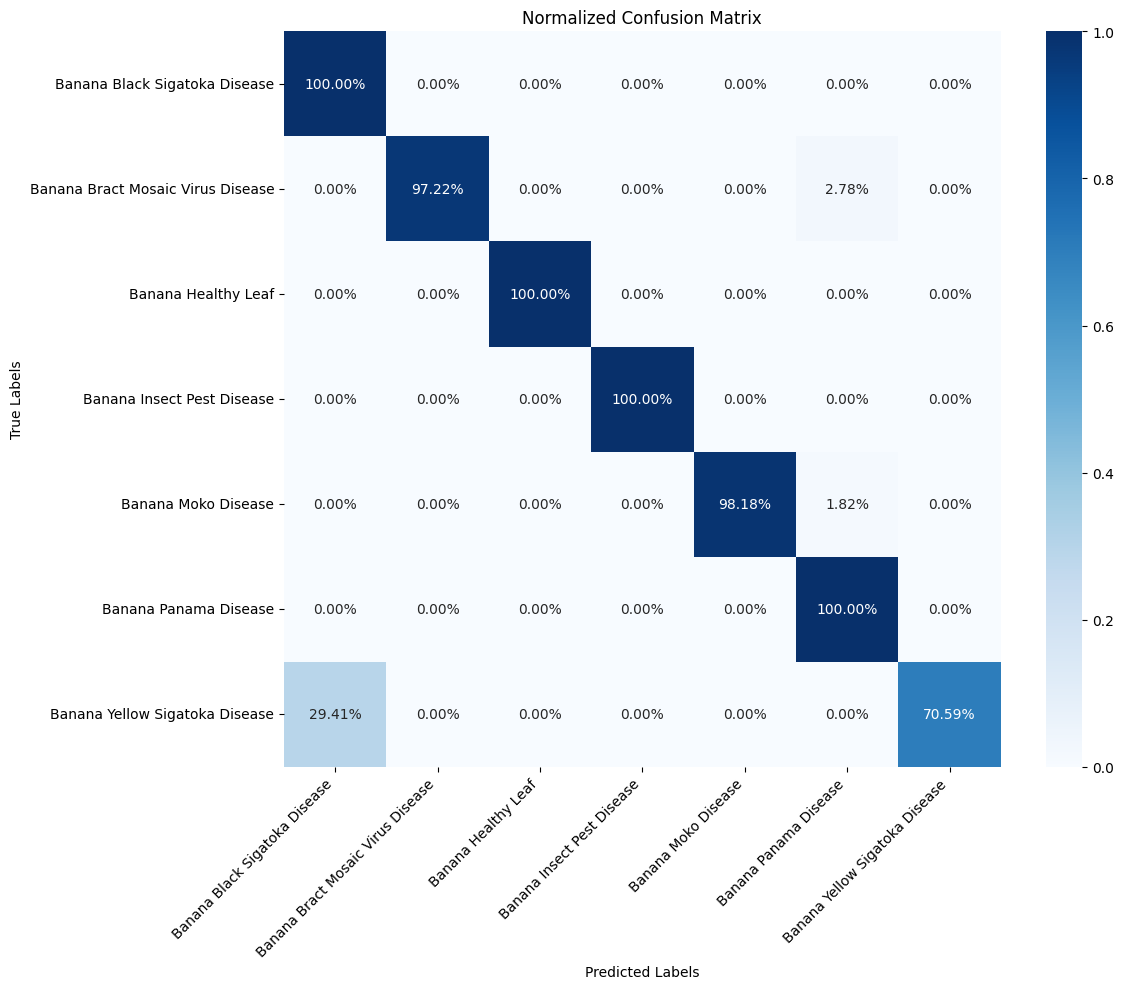


Top Misclassifications:
                                                 Image  \
27   /kaggle/working/yolo-banana-disease/test/image...   
201  /kaggle/working/yolo-banana-disease/test/image...   
251  /kaggle/working/yolo-banana-disease/test/image...   
71   /kaggle/working/yolo-banana-disease/test/image...   
96   /kaggle/working/yolo-banana-disease/test/image...   
316  /kaggle/working/yolo-banana-disease/test/image...   
287  /kaggle/working/yolo-banana-disease/test/image...   

                            True Label                Predicted Label  \
27      Banana Yellow Sigatoka Disease  Banana Black Sigatoka Disease   
201     Banana Yellow Sigatoka Disease  Banana Black Sigatoka Disease   
251     Banana Yellow Sigatoka Disease  Banana Black Sigatoka Disease   
71                 Banana Moko Disease          Banana Panama Disease   
96      Banana Yellow Sigatoka Disease  Banana Black Sigatoka Disease   
316     Banana Yellow Sigatoka Disease  Banana Black Sigatoka Disease   

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from ultralytics import YOLO
from pathlib import Path
import pandas as pd
import os

# Load the trained model
model = YOLO("/kaggle/working/runs/detect/train2/weights/best.pt")

# Get class names from the dataset directory
test_path = Path("/kaggle/working/yolo-banana-disease/test/images")
label_path = Path("/kaggle/working/yolo-banana-disease/test/labels")

# Extract class names from your dataset.yaml file
class_names = ['Banana Black Sigatoka Disease', 'Banana Bract Mosaic Virus Disease', 
               'Banana Healthy Leaf', 'Banana Insect Pest Disease', 'Banana Moko Disease', 
               'Banana Panama Disease', 'Banana Yellow Sigatoka Disease']

# Get all test images
test_images = list(test_path.glob("*.jpg"))

# Prepare lists to store predictions and true labels
y_true = []
y_pred = []
confidences = []
image_paths = []

# Process each test image
for img_path in test_images:
    # Get the corresponding label file
    label_file = label_path / f"{img_path.stem}.txt"
    
    # Read the true label from the file
    if label_file.exists():
        with open(label_file, "r") as f:
            label_content = f.read().strip()
            if label_content:
                # YOLO format: class_id x_center y_center width height
                true_label = int(label_content.split()[0])
                
                # Make prediction
                results = model.predict(source=str(img_path), conf=0.25)[0]
                
                # Get the class with highest confidence
                if len(results.boxes) > 0:
                    # Get classes and confidences
                    cls = results.boxes.cls.cpu().numpy()
                    conf = results.boxes.conf.cpu().numpy()
                    
                    if len(cls) > 0:
                        # Find the index of the box with highest confidence
                        best_idx = np.argmax(conf)
                        pred_label = int(cls[best_idx])
                        confidence = float(conf[best_idx])
                        
                        y_true.append(true_label)
                        y_pred.append(pred_label)
                        confidences.append(confidence)
                        image_paths.append(str(img_path))
                else:
                    # No detection - log this case for debugging
                    print(f"No detection for {img_path}")

# Generate metrics only if we have predictions
if len(y_true) > 0:
    # Calculate overall accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Overall Accuracy: {accuracy:.4f}")
    
    # Generate and print classification report
    report = classification_report(
        y_true, 
        y_pred, 
        target_names=class_names, 
        digits=4
    )
    print("Classification Report:")
    print(report)
    
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cm, 
        annot=True, 
        fmt='d', 
        cmap='Blues', 
        xticklabels=class_names, 
        yticklabels=class_names
    )
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('/kaggle/working/confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Create a DataFrame of predictions with confidence
    results_df = pd.DataFrame({
        'Image': image_paths,
        'True Label': [class_names[i] for i in y_true],
        'Predicted Label': [class_names[i] for i in y_pred],
        'Confidence': confidences,
        'Correct': [t == p for t, p in zip(y_true, y_pred)]
    })
    
    # Save results to CSV
    results_df.to_csv('/kaggle/working/prediction_results.csv', index=False)
    
    # Print some statistics
    print(f"Total test samples evaluated: {len(y_true)}")
    print(f"Correctly classified: {sum(t == p for t, p in zip(y_true, y_pred))}")
    print(f"Accuracy: {sum(t == p for t, p in zip(y_true, y_pred)) / len(y_true):.4f}")
    print(f"Average confidence score: {np.mean(confidences):.4f}")
    
    # Calculate per-class accuracy
    class_accuracy = {}
    for i, name in enumerate(class_names):
        mask = np.array(y_true) == i
        if sum(mask) > 0:
            class_accuracy[name] = np.mean(np.array(y_pred)[mask] == i)
    
    # Plot per-class accuracy
    plt.figure(figsize=(12, 6))
    classes = list(class_accuracy.keys())
    accuracies = list(class_accuracy.values())
    
    bars = plt.bar(classes, accuracies, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Accuracy')
    plt.title('Per-Class Accuracy')
    plt.xticks(rotation=45, ha='right')
    
    # Add percentage labels on top of each bar
    for bar, acc in zip(bars, accuracies):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{acc:.2%}', ha='center', va='bottom', rotation=0)
    
    plt.tight_layout()
    plt.savefig('/kaggle/working/per_class_accuracy.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Create a confusion matrix heatmap with normalized values (percentages)
    plt.figure(figsize=(12, 10))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(
        cm_normalized, 
        annot=True, 
        fmt='.2%', 
        cmap='Blues', 
        xticklabels=class_names, 
        yticklabels=class_names
    )
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Normalized Confusion Matrix')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('/kaggle/working/normalized_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Generate a detailed analysis of misclassifications
    mistakes = results_df[~results_df['Correct']]
    if not mistakes.empty:
        print("\nTop Misclassifications:")
        print(mistakes.sort_values('Confidence', ascending=False).head(10))
        
        # Create a matrix of misclassifications
        mistake_counts = {}
        for true_class in class_names:
            mistake_counts[true_class] = {}
            for pred_class in class_names:
                if true_class != pred_class:
                    count = len(mistakes[(mistakes['True Label'] == true_class) & 
                                       (mistakes['Predicted Label'] == pred_class)])
                    if count > 0:
                        mistake_counts[true_class][pred_class] = count
        
        print("\nMisclassification Analysis:")
        for true_class, errors in mistake_counts.items():
            if errors:
                print(f"\n{true_class} was misclassified as:")
                for pred_class, count in sorted(errors.items(), key=lambda x: x[1], reverse=True):
                    print(f"  - {pred_class}: {count} times")
else:
    print("No predictions were generated. Please check your test data paths and model.")

In [2]:
from ultralytics import YOLO
import os
import shutil

# Original model path in the read-only input directory
original_model_path = "/kaggle/input/banana-disease-detection-model/best_model2.pt"

# Create a copy of the model in the writable working directory
working_model_path = "/kaggle/working/best_model2.pt"
shutil.copy2(original_model_path, working_model_path)
print(f"Model copied to working directory: {working_model_path}")

# Load the model from the working directory
model = YOLO(working_model_path)
print("Model loaded successfully:", model)



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Model copied to working directory: /kaggle/working/best_model2.pt
Model loaded successfully: YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
   

In [5]:
dummy_input = model.model.model[0]
print(dummy_input)


Conv(
  (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
  (act): SiLU(inplace=True)
)


In [6]:
import torch

# Create a dummy input tensor
dummy_input = torch.randn(1, 3, 640, 640)

# Run a forward pass to make sure it works
with torch.no_grad():
    output = model.model(dummy_input)
print("Model ran successfully on input of shape:", dummy_input.shape)


Model ran successfully on input of shape: torch.Size([1, 3, 640, 640])


In [3]:
# Export to ONNX format
# This will save in the same directory as the model (working directory)
model.export(format="onnx", 
             imgsz=640, 
             half=True, 
             simplify=True,
             opset=12)

# The ONNX file will be saved in the working directory
onnx_path = "/kaggle/working/best_model2.onnx"
print(f"Model exported to ONNX format at: {onnx_path}")

Ultralytics 8.3.106 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
WARNING ⚠️ half=True only compatible with GPU export, i.e. use device=0
YOLO11m summary (fused): 125 layers, 20,035,429 parameters, 0 gradients, 67.7 GFLOPs

PyTorch: starting from '/kaggle/working/best_model2.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 11, 8400) (38.6 MB)
requirements: Ultralytics requirements ['onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 273.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 264.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 295.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 5.1s, installed 2 packages: ['onnxslim', 'onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with on

In [19]:
# Optionally, verify the ONNX model
try:
    import onnx
    onnx_model = onnx.load(onnx_path)
    onnx.checker.check_model(onnx_model)
    print("ONNX model verified successfully")
except Exception as e:
    print(f"Error verifying ONNX model: {e}")

ONNX model verified successfully


In [5]:
import onnx
import numpy as np
import onnxruntime as ort

# Load the model
model_path = "/kaggle/working/best_model2.onnx"
onnx_model = onnx.load(model_path)

# Print model metadata
print("Model inputs:")
for input in onnx_model.graph.input:
    print(f" - {input.name}: {input.type.tensor_type.shape}")

print("\nModel outputs:")
for output in onnx_model.graph.output:
    print(f" - {output.name}: {output.type.tensor_type.shape}")

# Check the final operation in the model
last_node = onnx_model.graph.node[-1]
print(f"\nFinal operation: {last_node.op_type}")

# Create a session and run inference with random data to check output values
session = ort.InferenceSession(model_path)
input_name = session.get_inputs()[0].name
input_shape = session.get_inputs()[0].shape

# Create a random input tensor
random_input = np.random.randn(*input_shape).astype(np.float32)

# Run inference
outputs = session.run(None, {input_name: random_input})

# Check output values
output_values = outputs[0][0]  # First batch, all classes
print("\nOutput range:")
print(f"Min value: {output_values.min()}")
print(f"Max value: {output_values.max()}")
print(f"Sum of values: {output_values.sum()}")  # If sum ≈ 1.0, likely softmax probabilities

# Show sample values
print("\nSample output values:")
print(output_values)

Model inputs:
 - images: dim {
  dim_value: 1
}
dim {
  dim_value: 3
}
dim {
  dim_value: 640
}
dim {
  dim_value: 640
}


Model outputs:
 - output0: dim {
  dim_value: 1
}
dim {
  dim_value: 11
}
dim {
  dim_value: 8400
}


Final operation: Concat

Output range:
Min value: -16.696685791015625
Max value: 635.5957641601562
Sum of values: 7084389.5

Sample output values:
[[    0.55745       7.648      15.255 ...       524.1      539.43       568.1]
 [     3.2543      1.6846     0.09475 ...      582.39      580.39      580.65]
 [     27.414      30.286      29.657 ...      232.14      201.45      152.76]
 ...
 [          0           0           0 ...  4.7684e-07  1.1623e-06  6.1393e-06]
 [          0           0           0 ...  5.0664e-07  1.2219e-06   5.275e-06]
 [          0           0           0 ...  2.0862e-07  6.8545e-07  4.2617e-06]]


In [8]:
# Print all input names, shapes, and types
print("=== DETAILED INPUT INFORMATION ===")
for input in onnx_model.graph.input:
    print(f"Input name: {input.name}")
    shape_info = [dim.dim_value for dim in input.type.tensor_type.shape.dim]
    print(f"Input shape: {shape_info}")
    if hasattr(input.type.tensor_type, 'elem_type'):
        print(f"Input type: {input.type.tensor_type.elem_type}")
        
# Create a session
session = ort.InferenceSession(model_path)

# Get input details from the session
print("\n=== SESSION INPUT DETAILS ===")
inputs = session.get_inputs()
for i, input_info in enumerate(inputs):
    print(f"Input #{i}:")
    print(f"  Name: {input_info.name}")
    print(f"  Shape: {input_info.shape}")
    print(f"  Type: {input_info.type}")

# Examine a few nodes in the graph to determine normalization approach
print("\n=== CHECKING FOR NORMALIZATION OPERATIONS ===")
normalization_ops = []
for i, node in enumerate(onnx_model.graph.node[:20]):  # Check first 20 nodes
    if node.op_type in ['Div', 'Sub', 'Mul']:
        print(f"Possible normalization operation found: {node.op_type}")
        print(f"  Inputs: {node.input}")
        print(f"  Outputs: {node.output}")
        normalization_ops.append(node)

if not normalization_ops:
    print("No explicit normalization operations found in first 20 nodes.")
    print("Model likely expects images to be normalized by dividing by 255.")

=== DETAILED INPUT INFORMATION ===
Input name: images
Input shape: [1, 3, 640, 640]
Input type: 1

=== SESSION INPUT DETAILS ===
Input #0:
  Name: images
  Shape: [1, 3, 640, 640]
  Type: tensor(float)

=== CHECKING FOR NORMALIZATION OPERATIONS ===
Possible normalization operation found: Mul
  Inputs: ['/model.0/conv/Conv_output_0', '/model.0/act/Sigmoid_output_0']
  Outputs: ['/model.0/act/Mul_output_0']
Possible normalization operation found: Mul
  Inputs: ['/model.1/conv/Conv_output_0', '/model.1/act/Sigmoid_output_0']
  Outputs: ['/model.1/act/Mul_output_0']
Possible normalization operation found: Mul
  Inputs: ['/model.2/cv1/conv/Conv_output_0', '/model.2/cv1/act/Sigmoid_output_0']
  Outputs: ['/model.2/cv1/act/Mul_output_0']
Possible normalization operation found: Mul
  Inputs: ['/model.2/m.0/cv1/conv/Conv_output_0', '/model.2/m.0/cv1/act/Sigmoid_output_0']
  Outputs: ['/model.2/m.0/cv1/act/Mul_output_0']
Possible normalization operation found: Mul
  Inputs: ['/model.2/m.0/cv2/co